In [214]:
import pandas as pd 

In [215]:
# The first improvment of the group project should be the data preprocessing
raw_df = pd.read_csv("./delhivery_data.csv")
raw_df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [216]:
# for following process the pd.to_datetime's format
raw_df['cutoff_timestamp'][:4]

0           2018-09-20 04:27:55
1           2018-09-20 04:17:55
2    2018-09-20 04:01:19.505586
3           2018-09-20 03:39:57
Name: cutoff_timestamp, dtype: object

In [217]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [218]:
# drop null and dupliacted
raw_df.isnull().sum()
raw_df = raw_df.dropna(axis=1).drop_duplicates()
raw_df.isnull().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
destination_center                0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

In [219]:
raw_df.shape

(144867, 22)

In [220]:
# to test the columns to be converted into datetime
for col_name, value in zip(raw_df.columns, raw_df.iloc[0]):
    print(f"{col_name}: {value}")

data: training
trip_creation_time: 2018-09-20 02:35:36.476840
route_schedule_uuid: thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3297ef
route_type: Carting
trip_uuid: trip-153741093647649320
source_center: IND388121AAA
destination_center: IND388620AAB
od_start_time: 2018-09-20 03:21:32.418600
od_end_time: 2018-09-20 04:47:45.236797
start_scan_to_end_scan: 86.0
is_cutoff: True
cutoff_factor: 9
cutoff_timestamp: 2018-09-20 04:27:55
actual_distance_to_destination: 10.43566024429648
actual_time: 14.0
osrm_time: 11.0
osrm_distance: 11.9653
factor: 1.2727272727272727
segment_actual_time: 14.0
segment_osrm_time: 11.0
segment_osrm_distance: 11.9653
segment_factor: 1.2727272727272727


In [221]:
# convert the type of columns
time_columns = ['trip_creation_time', 'od_start_time', 'od_end_time', 'cutoff_timestamp']
for col in time_columns:
    raw_df[col] = pd.to_datetime(raw_df[col],format='mixed') 
raw_df.isnull().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
destination_center                0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

In [222]:
# successfully processed
raw_df['cutoff_timestamp'][:4]

0   2018-09-20 04:27:55.000000
1   2018-09-20 04:17:55.000000
2   2018-09-20 04:01:19.505586
3   2018-09-20 03:39:57.000000
Name: cutoff_timestamp, dtype: datetime64[ns]

In [223]:
"""
# According to the introduction on Kaggle, columns' meanings are listed below

• data - tells whether the data is testing or training data
• trip_creation_time – Timestamp of trip creation
• route_schedule_uuid – Unique Id for a particular route schedule
• route_type – Transportation type
• FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
• Carting: Handling system consisting of small vehicles (carts)
• trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)
• source_center - Source ID of trip origin
• source_name - Source Name of trip origin
• destination_cente – Destination ID
• destination_name – Destination Name
• od_start_time – Trip start time
• od_end_time – Trip end time
• start_scan_to_end_scan – Time taken to deliver from source to destination
• is_cutoff – Unknown field
• cutoff_factor – Unknown field
• cutoff_timestamp – Unknown field
• actual_distance_to_destination – Distance in Kms between source and destination warehouse
• actual_time – Actual time taken to complete the delivery (Cumulative)
• osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
• osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
• factor – Unknown field
• segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
• segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
• segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
• segment_factor – Unknown field
"""
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   destination_center              144867 non-null  object        
 7   od_start_time                   144867 non-null  datetime64[ns]
 8   od_end_time                     144867 non-null  datetime64[ns]
 9   start_scan_to_end_scan          144867 non-null  float64       
 10  is_cutoff                       144867 non-null  bool   

In [224]:
# since the data column has the training and testing classgory, then we can divide it into two dataframe
raw_df.data.value_counts()

train_df = raw_df[raw_df.data == 'training']
test_df = raw_df[raw_df.data == 'test']

train_df.shape, test_df.shape

((104858, 22), (40009, 22))

In [225]:
train_df.columns
print(train_df.route_type.value_counts())
print(test_df.route_type.value_counts())
# the the proportion of route type in illustrated in the two categories
# the primary processing of data comes to the end

route_type
FTL        73108
Carting    31750
Name: count, dtype: int64
route_type
FTL        26552
Carting    13457
Name: count, dtype: int64


In [226]:
# The second improvement of the group project should be the visualization
# the former one put all emphasis on the single feature while neglecting the mutual influence among different variables
# and I want to improve that

# starting with the source and destination
Source_dict = dict(train_df['source_center'].value_counts())
Des_dict = dict(train_df['destination_center'].value_counts())
# these are frequency to be sources or destinations
# then the merge of source counts and desination counts is applied, with the first value in the list for souce counts
merged_dict = {}
for key, value in Source_dict.items():
    merged_dict[key] = [value]

for key, value in Des_dict.items():
    if key in merged_dict:
        merged_dict[key].append(value)
    else:
        merged_dict[key] = [0, value]

print(merged_dict)

# convert dict into list
Source_and_des = pd.DataFrame.from_dict(merged_dict, orient='index').reset_index()
Source_and_des.columns = ['CenterID', 'NumAsSource', 'NumAsDes']
Source_and_des


{'IND000000ACB': [16472, 11422], 'IND562132AAA': [7391, 7992], 'IND421302AAG': [6430, 3984], 'IND411033AAA': [3401, 2772], 'IND501359AAE': [2559, 3890], 'IND160002AAC': [1968, 2094], 'IND712311AAA': [1908, 3457], 'IND395023AAA': [1562, 775], 'IND560099AAB': [1475, 1092], 'IND110037AAM': [1383, 2691], 'IND131028AAB': [1370, 2266], 'IND382430AAB': [1316, 1394], 'IND600056AAB': [1293, 1541], 'IND751002AAB': [1154, 2169], 'IND781018AAB': [1137, 456], 'IND560300AAA': [930, 828], 'IND209304AAA': [926, 1436], 'IND462022AAA': [796, 1331], 'IND834002AAB': [763, 719], 'IND854326AAB': [709, 255], 'IND530012AAA': [582, 550], 'IND110044AAB': [578, 84], 'IND000000ACT': [517], 'IND302014AAA': [502, 1030], 'IND842001AAA': [482, 810], 'IND400072AAB': [450, 403], 'IND306401AAB': [444, 185], 'IND121004AAB': [425, 446], 'IND416012AAA': [411, 478], 'IND821115AAB': [395, 563], 'IND000000ACA': [393, 368], 'IND413002AAA': [355, 486], 'IND518002AAA': [350, 365], 'IND825409AAA': [350, 24], 'IND403726AAA': [331,

,CenterID,NumAsSource,NumAsDes
0,IND000000ACB,16472,11422.0
1,IND562132AAA,7391,7992.0
2,IND421302AAG,6430,3984.0
3,IND411033AAA,3401,2772.0
4,IND501359AAE,2559,3890.0
...,...,...,...
1585,IND148024AAB,0,1.0
1586,IND686141AAA,0,1.0
1587,IND000000AFS,0,1.0
1588,IND761020AAA,0,1.0


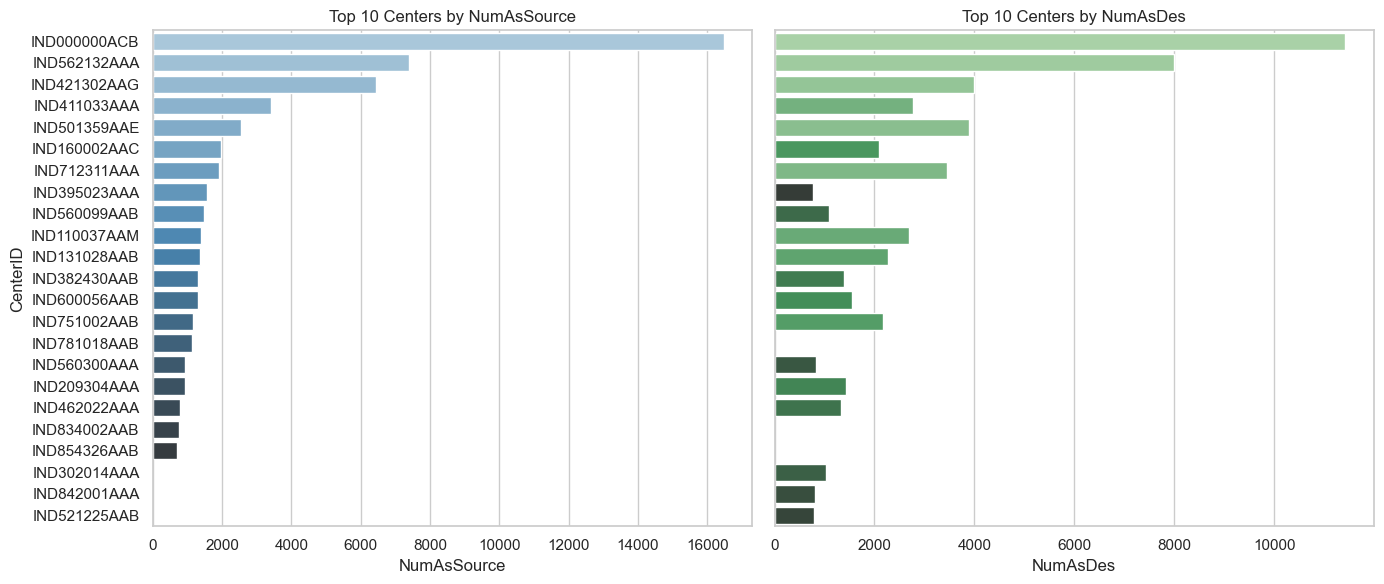

In [227]:
import seaborn as sns
import matplotlib.pyplot as plt

# to better visualize the top source and desination, the top 10s are included in the hist grams
top_source = Source_and_des.nlargest(20, "NumAsSource")
top_des = Source_and_des.nlargest(20, "NumAsDes")

sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.barplot(ax=axes[0], y="CenterID", x="NumAsSource", hue = "CenterID", data=top_source, palette="Blues_d", legend=False)
axes[0].set_title("Top 10 Centers by NumAsSource")
axes[0].set_xlabel("NumAsSource")
axes[0].set_ylabel("CenterID")

sns.barplot(ax=axes[1], y="CenterID", x="NumAsDes", hue = "CenterID", data=top_des, palette="Greens_d", legend=False)
axes[1].set_title("Top 10 Centers by NumAsDes")
axes[1].set_xlabel("NumAsDes")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

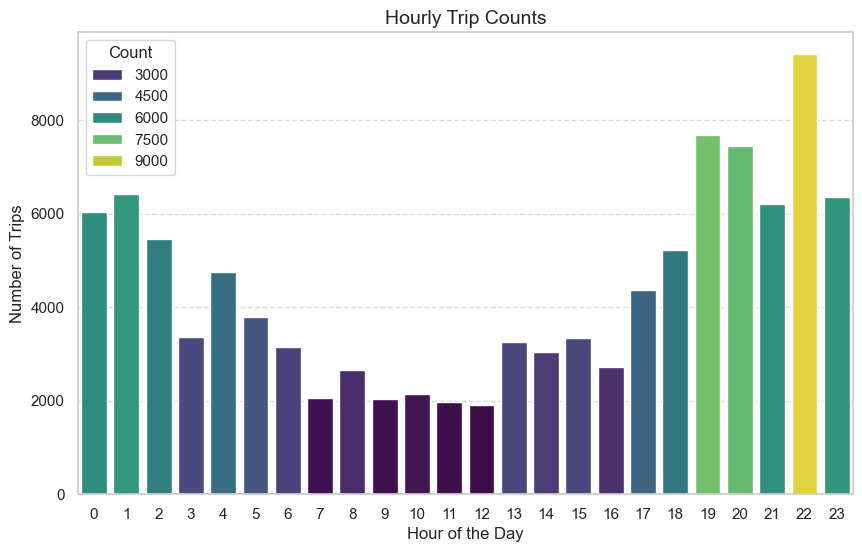

In [228]:
# conclusion can be reached that the main sources are the major desinations as well
# then it comes to the time 

train_df['trip_creation_time'].dt.month.value_counts()
# only september is included
Sep_day_counts = train_df['trip_creation_time'].dt.day.value_counts().sort_index()
# only from Sep.12 to Sep.26
# the pattern should be found in more detailed time
Sep_day_counts
hourly_counts = train_df['trip_creation_time'].dt.hour.value_counts().sort_index()
hourly_counts 

hourly_counts_df = hourly_counts.reset_index()
hourly_counts_df.columns = ['Hour', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(x='Hour', y='Count', hue = 'Count', data=hourly_counts_df, palette='viridis')
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.title('Hourly Trip Counts', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
# it reveals a interesting trend that more trips was created beyound noon, and we can divided into three categories: busy, medium, and spare

In [229]:
train_df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'destination_center', 'od_start_time',
       'od_end_time', 'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [230]:
# Also, another things need to be varified is the duration of every trip
# in the group assign, models are utilized to verify the most crediable from osrm, actual, and segment
# but with more detailed dataset, other methods can be applied to verify this thing
duration_from_various = ['actual_time', 'osrm_time', 'segment_actual_time', 'segment_osrm_time']
Duration_test_df = train_df[time_columns + duration_from_various ]

Duration_test_df['From_Creation_To_end'] = (Duration_test_df['od_end_time'] - Duration_test_df['trip_creation_time']).dt.total_seconds() / 60
Duration_test_df['From_Creation_To_cutoff'] = (Duration_test_df['cutoff_timestamp'] - Duration_test_df['trip_creation_time']).dt.total_seconds() / 60
Duration_test_df['From_Start_To_end'] = (Duration_test_df['od_end_time'] - Duration_test_df['od_start_time']).dt.total_seconds() / 60
Duration_test_df['From_Start_To_cutoff'] = (Duration_test_df['cutoff_timestamp'] - Duration_test_df['od_start_time']).dt.total_seconds() / 60


/var/folders/8t/3xrvdszj1g75llc2jb40dnvw0000gn/T/ipykernel_29806/2340368982.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Duration_test_df['From_Creation_To_end'] = (Duration_test_df['od_end_time'] - Duration_test_df['trip_creation_time']).dt.total_seconds() / 60
/var/folders/8t/3xrvdszj1g75llc2jb40dnvw0000gn/T/ipykernel_29806/2340368982.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Duration_test_df['From_Creation_To_cutoff'] = (Duration_test_df['cutoff_timestamp'] - Duration_test_df['trip_creat

In [231]:
Duration_test_df
# However, no pattern can be from the comparison of time duration, which should be a failure attemption
# but these can be used as the model in the next model construction section

,trip_creation_time,od_start_time,od_end_time,cutoff_timestamp,actual_time,osrm_time,segment_actual_time,segment_osrm_time,From_Creation_To_end,From_Creation_To_cutoff,From_Start_To_end,From_Start_To_cutoff
0,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 04:27:55.000000,14.0,11.0,14.0,11.0,132.145999,112.308719,86.213637,66.376357
1,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 04:17:55.000000,24.0,20.0,10.0,9.0,132.145999,102.308719,86.213637,56.376357
2,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 04:01:19.505586,40.0,28.0,16.0,7.0,132.145999,85.717146,86.213637,39.784783
3,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 03:39:57.000000,62.0,40.0,21.0,12.0,132.145999,64.342053,86.213637,18.409690
4,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 03:33:55.000000,68.0,44.0,6.0,5.0,132.145999,58.308719,86.213637,12.376357
...,...,...,...,...,...,...,...,...,...,...,...,...
144862,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,2018-09-20 21:57:20.000000,94.0,60.0,12.0,12.0,427.686364,332.859396,427.686364,332.859396
144863,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,2018-09-20 21:31:18.000000,120.0,76.0,26.0,21.0,427.686364,306.826063,427.686364,306.826063
144864,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,2018-09-20 21:11:18.000000,140.0,88.0,20.0,34.0,427.686364,286.826063,427.686364,286.826063
144865,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,2018-09-20 20:53:19.000000,158.0,98.0,17.0,27.0,427.686364,268.842729,427.686364,268.842729


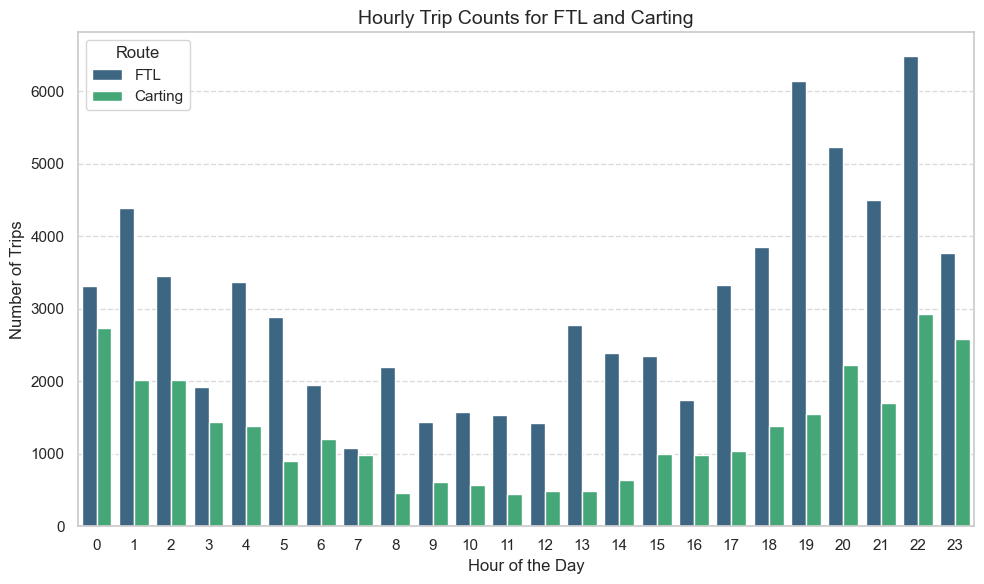

In [232]:
train_df.describe()
train_df.columns
# route_type can also be visualized align with creation time
hourly_counts_withRouteTyoe = train_df[['trip_creation_time', 'route_type']]
hourly_counts_forFTL = train_df[train_df.route_type == 'FTL']['trip_creation_time'].dt.hour.value_counts().sort_index()
hourly_counts_forCarting = train_df[train_df.route_type == 'Carting']['trip_creation_time'].dt.hour.value_counts().sort_index()
#train_df.route_type.value_counts(0)
#hourly_counts_forFTL

hourly_counts_df = pd.DataFrame({
    'Hour': list(hourly_counts_forFTL.index) + list(hourly_counts_forCarting.index),
    'Count': list(hourly_counts_forFTL.values) + list(hourly_counts_forCarting.values),
    'Route': ['FTL'] * len(hourly_counts_forFTL) + ['Carting'] * len(hourly_counts_forCarting)
})


plt.figure(figsize=(10, 6))

sns.barplot(x='Hour', y='Count', hue='Route', data=hourly_counts_df, palette='viridis')

plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.title('Hourly Trip Counts for FTL and Carting', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
# it reveals that the overall trend in two transportation are the same but FTL is generally more popular than Catering